<a href="https://colab.research.google.com/github/KunalRoutray/Deep-Learning/blob/main/Compare_Different_Optimizer(Ass_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 import libraries


```
# This is formatted as code
```



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import SGD,Adagrad,RMSprop,Adam
from tensorflow.keras.utils import to_categorical



import warnings
warnings.filterwarnings('ignore')

2.Load and Preprocess the Dataset

In [2]:
# Get the data
url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data=pd.read_csv(url,delimiter=';')


In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


3.Perform EDA

In [6]:
X=data.drop('quality',axis=1)
y=data['quality']

print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [7]:
# split training and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [8]:
#scaling

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


4.Build Multi-Class MLP Model

In [9]:
# create the MLP model
def create_model():

    model=Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    return model

model=create_model()

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,178 (12.41 KB)

 Trainable params: 3,178 (12.41 KB)

 Non-trainable params: 0 (0.00 B)

5.Train and Evaluate Using Different Optimizers

In [10]:

optimizer={"SGD":SGD(learning_rate=0.001),
           "Mini-batch SGD":SGD(learning_rate=0.01),
           "SGD with Momentum":SGD(learning_rate=0.001,momentum=0.9),
           "Adagrad":Adagrad(learning_rate=0.1,initial_accumulator_value=0),
           "RMSprop":RMSprop(learning_rate=0.001,rho=0.9),
           "Adam":Adam(learning_rate=0.001),
           }

history_dict={}

for name,optimizer in optimizer.items():

    model=Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(10,activation='softmax'))

    print(f"Training with {name}")

    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history=model.fit(X_train,y_train,epochs=50,validation_split=0.2,verbose=1)

    history_dict[name]=history

Training with SGD
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4298 - loss: 2.2024 - val_accuracy: 0.3477 - val_loss: 1.6648
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3798 - loss: 1.5991 - val_accuracy: 0.3711 - val_loss: 1.5055
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4053 - loss: 1.3964 - val_accuracy: 0.4062 - val_loss: 1.4125
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4264 - loss: 1.3226 - val_accuracy: 0.4375 - val_loss: 1.3580
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4733 - loss: 1.2495 - val_accuracy: 0.4492 - val_loss: 1.3112
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4661 - loss: 1.2601 - val_accuracy: 0.4531 - val_loss: 1.2764
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4651 - loss: 1.2189 - val_accuracy: 0.4531 - val_loss: 1.2533
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5155 - loss: 1.1857 - val_accuracy:

6.Compare Optimizer Performance

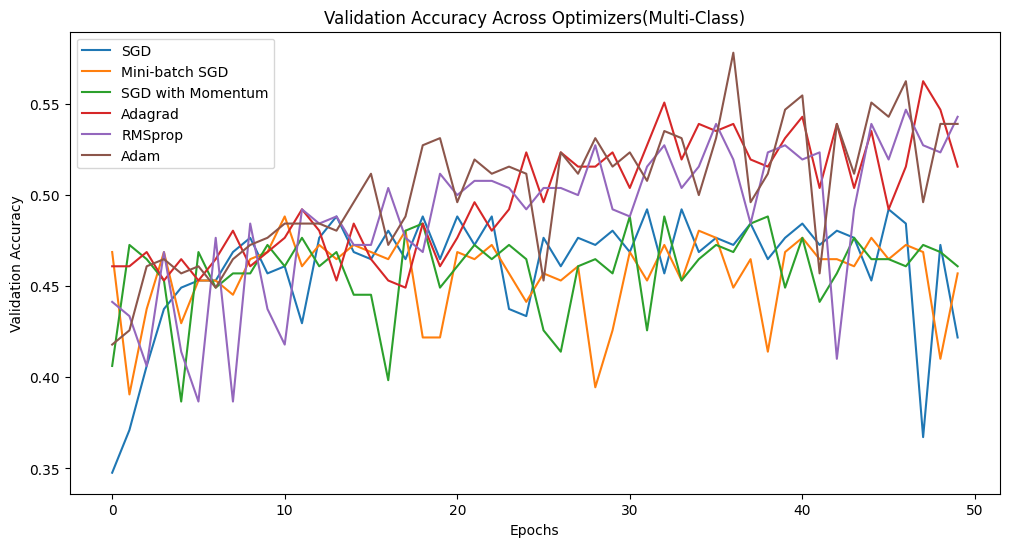

In [11]:
#printing training accuracy for different optimizers
plt.figure(figsize=(12,6))
for name,history in history_dict.items():
    val_acc=history.history['val_accuracy']
    plt.plot(val_acc,label=name)

plt.title("Validation Accuracy Across Optimizers(Multi-Class)")
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

7.Print Final Accuracy

In [12]:
for name,history in history_dict.items():
    final_acc=history.history['val_accuracy'][-1]
    print(f" Final Validation accuracy with {name}: {final_acc:.4f}")



 Final Validation accuracy with SGD: 0.4219
 Final Validation accuracy with Mini-batch SGD: 0.4570
 Final Validation accuracy with SGD with Momentum: 0.4609
 Final Validation accuracy with Adagrad: 0.5156
 Final Validation accuracy with RMSprop: 0.5430
 Final Validation accuracy with Adam: 0.5391
